# PUBG Finish Placement Prediction
## Problem Statement:
You must create a model which predicts players' finishing placement based on their final stats, on a scale from 1 (first place) to 0 (last place)
## Target Output
winPlacePerc - This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.
### Data Dictionary:

##### Data Dictionary:

* **DBNOs** - Number of enemy players knocked.
* **assists** - Number of enemy players this player damaged that were killed by teammates.
* **boosts** - Number of boost items used.
* **damageDealt** - Total damage dealt. Note: Self inflicted damage is subtracted.
* **headshotKills** - Number of enemy players killed with headshots.
* **heals** - Number of healing items used.
* **Id** - Player’s Id
* **killPlace** - Ranking in match of number of enemy players killed.
* **killPoints** - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a **value other** than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.
* **killStreaks** - Max number of enemy players killed in a short amount of time.
* **kills** - Number of enemy players killed.
* **longestKill** - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.
* **matchDuration** - Duration of match in seconds.
* **matchId** - ID to identify match. There are no matches that are in both the training and testing set.
* **matchType** - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, “duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.
* **rankPoints** - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.
* **revives** - Number of times this player revived teammates.
* **rideDistance** - Total distance traveled in vehicles measured in meters.
* **roadKills** - Number of kills while in a vehicle.
* **swimDistance** - Total distance traveled by swimming measured in meters.
* **teamKills** - Number of times this player killed a teammate.
* **vehicleDestroys** - Number of vehicles destroyed.
* **walkDistance** - Total distance traveled on foot measured in meters.
* **weaponsAcquired** - Number of weapons picked up.
* **winPoints** - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.
* **groupId** - ID to identify a group within a match. If the same group of players plays in different matches, they will have a different groupId each time.
* **numGroups** - Number of groups we have data for in the match.
* **maxPlace** - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.
* **winPlacePerc** - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.



In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import seaborn as sns
import os
print(os.listdir("kag_data"))

# Any results you write to the current directory are saved as output.

['sample_submission_V2.csv', 'test_V2.csv', 'train_V2.csv']


In [6]:
data = pd.read_csv('kag_data/train_V2.csv')

**Taking Sample of 50000 out of 4446966 players only**

In [7]:
train = data.copy()
# train.info()
train = train.iloc[:50000:2,:]
train.head()
# train.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.0,0,0,0,60,...,0,0.0,0,0.0,0,0,244.80,1,1466,0.4444
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.0,0,0,0,47,...,0,0.0,0,0.0,0,0,161.80,2,0,0.7755
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.0,0,0,0,45,...,0,0.0,0,0.0,0,0,49.75,2,0,0.1875
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.0,0,0,0,96,...,0,0.0,0,0.0,0,0,13.50,1,1497,0.0000
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.6,0,0,0,64,...,0,0.0,0,0.0,0,0,799.90,4,0,0.3704


In [8]:
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

## Univariate Analysis

**Kills Distribution**

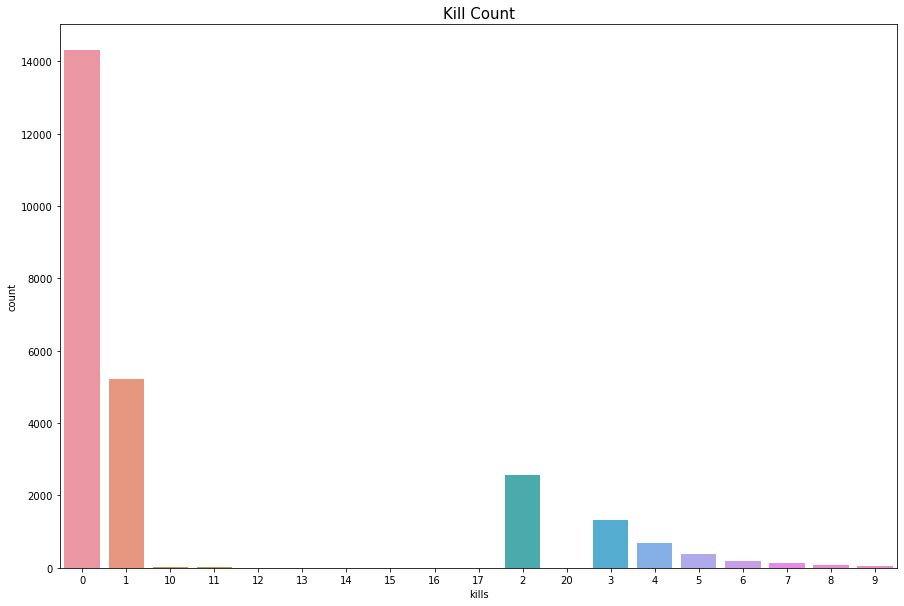

In [9]:
d = train.kills.value_counts()
plt.figure(figsize=(15,10))
sns.countplot(train['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)
plt.show()

In [10]:
print("Average kills "+str(train['kills'].mean())+" & Maximum kills is "+str(train['kills'].max()))

Average kills 0.91712 & Maximum kills is 20


**Walking Distance Distribution**

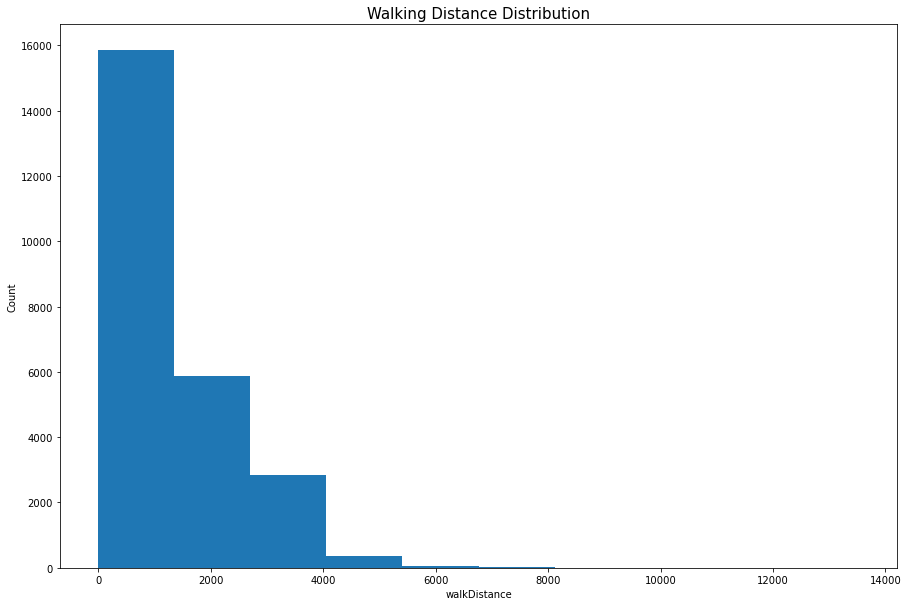

In [11]:
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
plt.hist(train['walkDistance'])
plt.xlabel("walkDistance")
plt.ylabel("Count")
plt.show()

**Ride Distance Distribution**

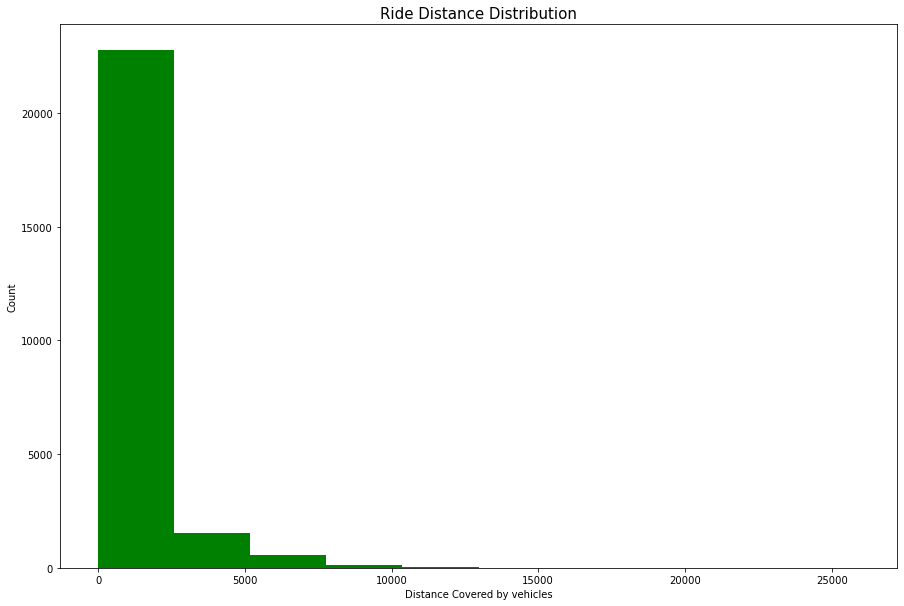

In [13]:
plt.figure(figsize=(15,10))
plt.title("Ride Distance Distribution",fontsize=15)
plt.hist(train['rideDistance'],bins =10,color= 'Green')
plt.xlabel('Distance Covered by vehicles')
plt.ylabel("Count")
plt.show()

**Swim Distance Distribution**

C:\Users\Shekhu\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


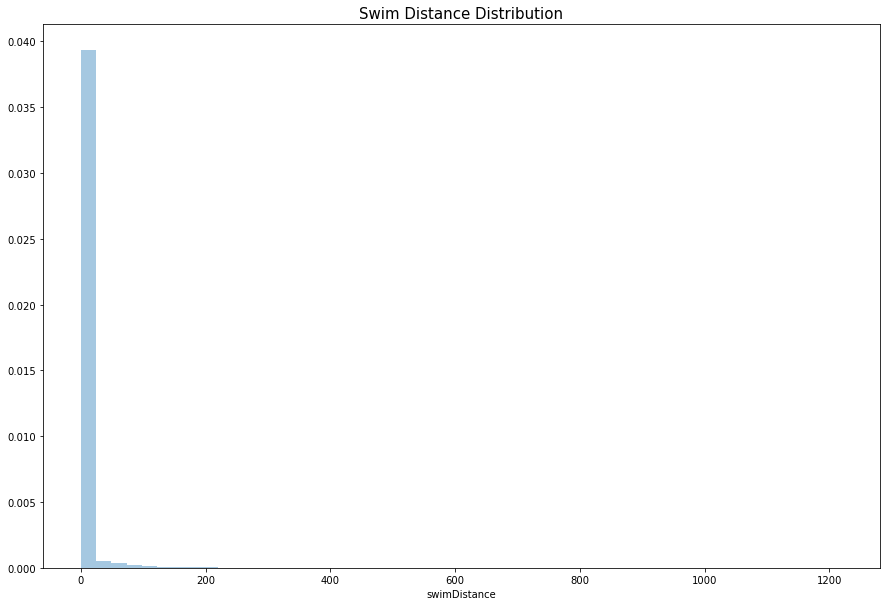

In [15]:
plt.figure(figsize=(15,10))
plt.title("Swim Distance Distribution",fontsize=15)
sns.distplot(train['swimDistance'])
plt.show()

**Distribution on the basis of Match type**

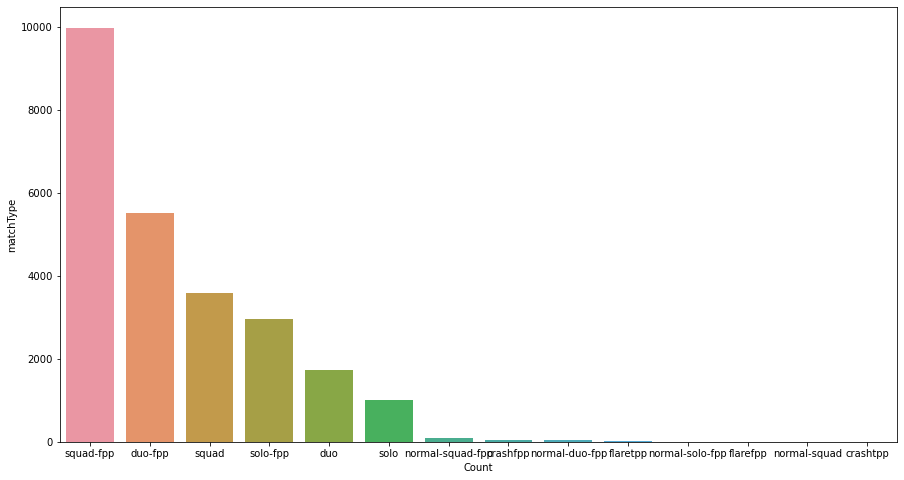

In [16]:
f,ax = plt.subplots(figsize=(15,8))
sns.barplot(train.matchType.value_counts().index,train.matchType.value_counts().values)
plt.xlabel('Count')
plt.ylabel('matchType')
plt.show()

**Assist Distribution**

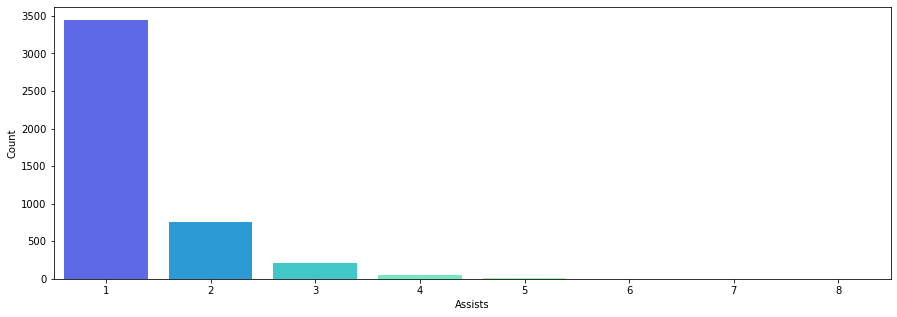

In [17]:
assist = train.assists.value_counts()
assist = assist[assist.index>0]
f,ax = plt.subplots(figsize=(15,5))
ax = sns.barplot(assist.index,assist.values,palette='rainbow')
plt.xlabel('Assists')
plt.ylabel('Count')
plt.show()

**DBNOs Distribution**

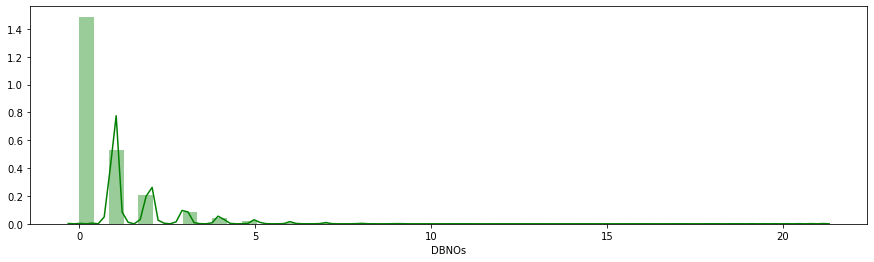

In [18]:
f,ax = plt.subplots(figsize=(15,4))
ax = sns.distplot(train['DBNOs'],color='green')
plt.show()

**Match Duration Distribution**

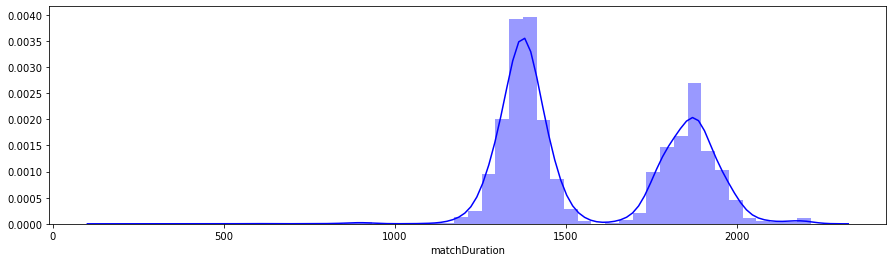

In [20]:
f,ax = plt.subplots(figsize=(15,4))
ax = sns.distplot(train.matchDuration,color='blue')
plt.show()

## Bivariate Analysis

**WinPlacePerc vs Kills**

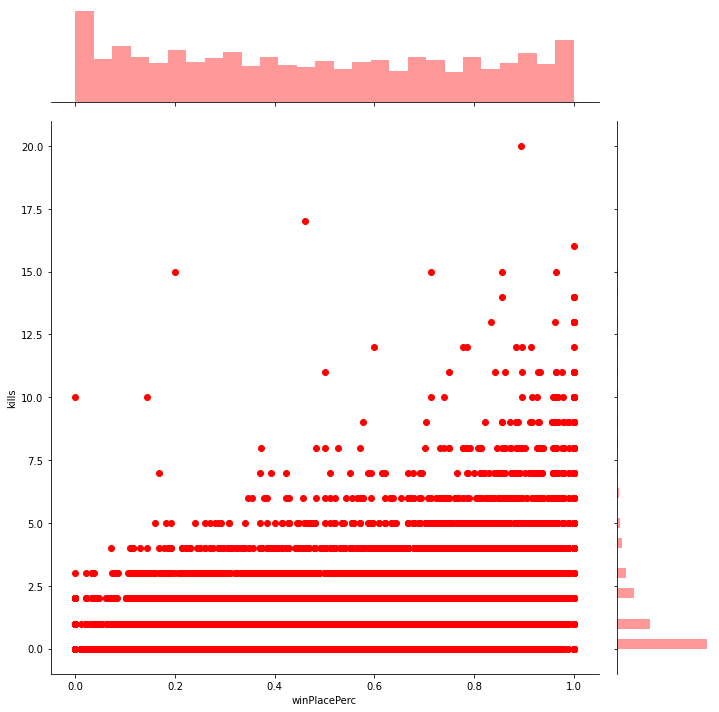

In [21]:
sns.jointplot(x="winPlacePerc", y="kills", data=train, height=10, color="r")
plt.show()

**Categories of Kills**

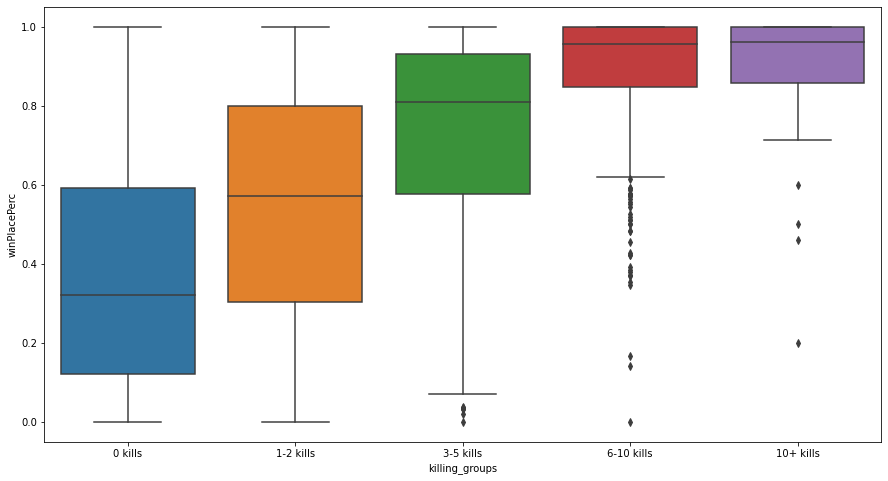

In [22]:
killing_groups = train.copy()

killing_groups['killing_groups'] = pd.cut(killing_groups['kills'], [-1, 0, 2, 5, 10, 20], labels=['0 kills','1-2 kills', '3-5 kills', '6-10 kills', '10+ kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killing_groups", y="winPlacePerc", data=killing_groups)
plt.show()

**winPlacePerc vs walkDistance**

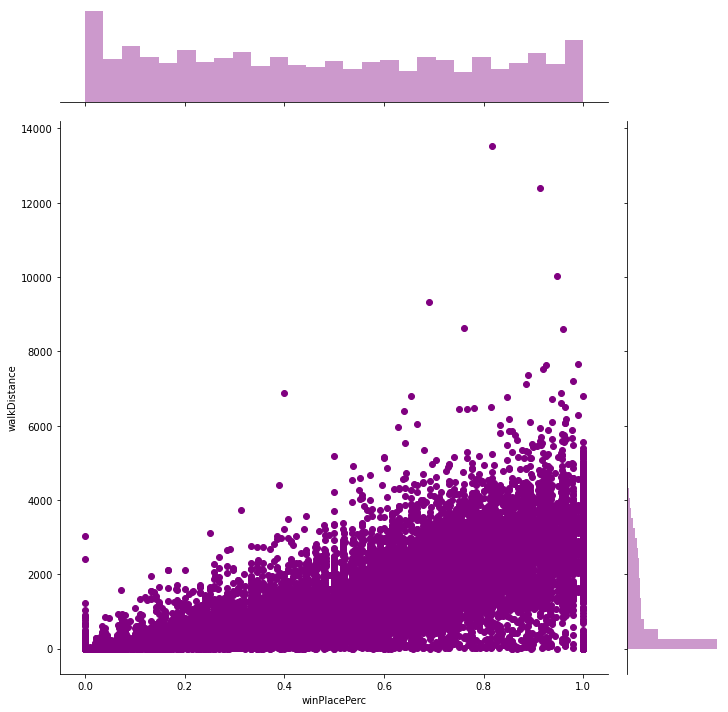

In [23]:
sns.jointplot(x ='winPlacePerc',y='walkDistance',data = train,height= 10,color='purple')
plt.show()

**winPlacePerc vs boosts**

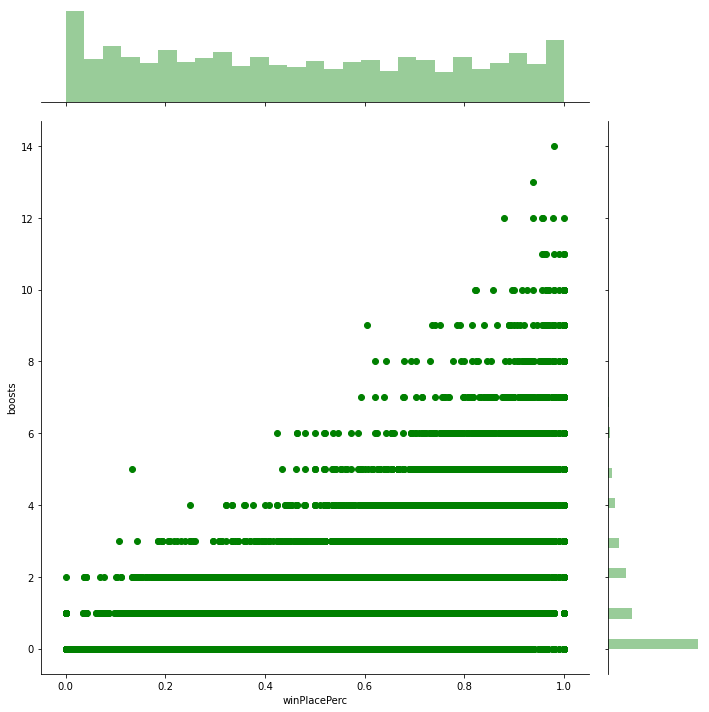

In [24]:
ax = sns.jointplot(x ='winPlacePerc',y='boosts',data = train,height=10,color='green')
plt.show()

**winPlacePerc vs weaponsAcquired**

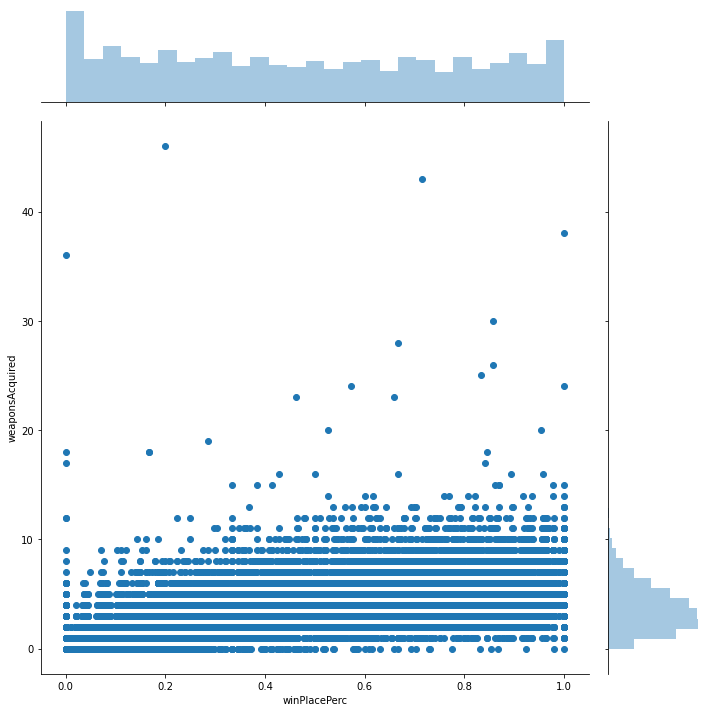

In [25]:
ax = sns.jointplot(train['winPlacePerc'],train['weaponsAcquired'],height=10)
plt.show()

**winPlacePerc vs damageDealt**

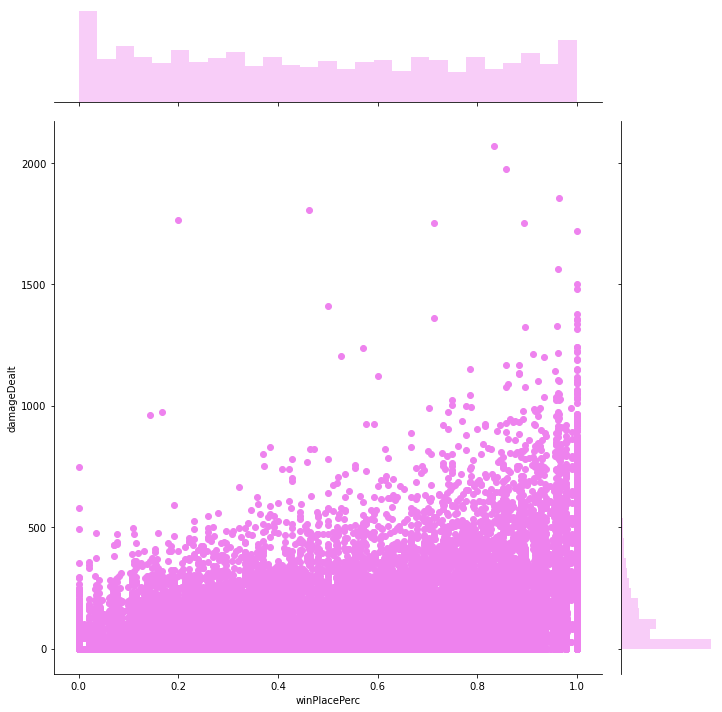

In [26]:
ax = sns.jointplot(train['winPlacePerc'],train['damageDealt'],height = 10,color ='violet')
plt.show()

**winPlacePerc vs heals**

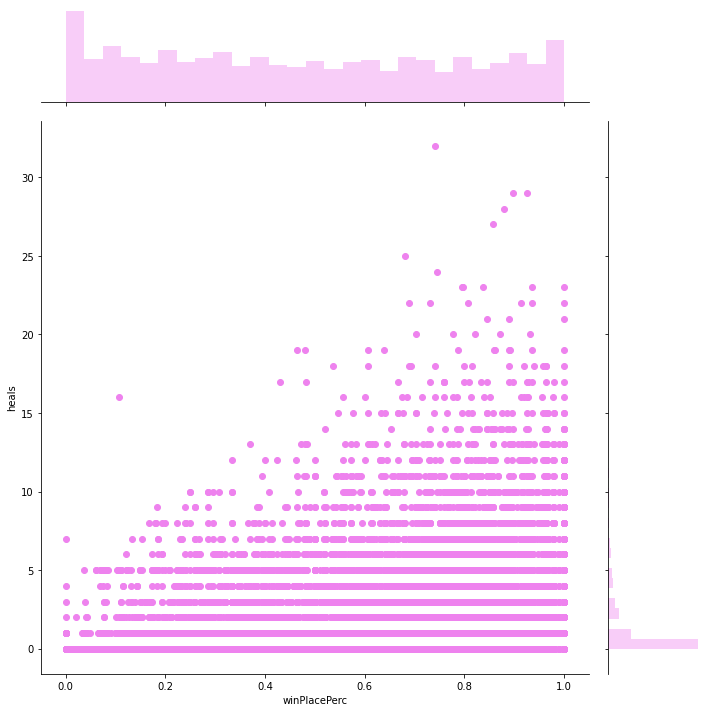

In [28]:
ax = sns.jointplot(train['winPlacePerc'],train['heals'],height= 10,color='violet')
plt.show()

**Heals vs Boosts on winPlacePerc**

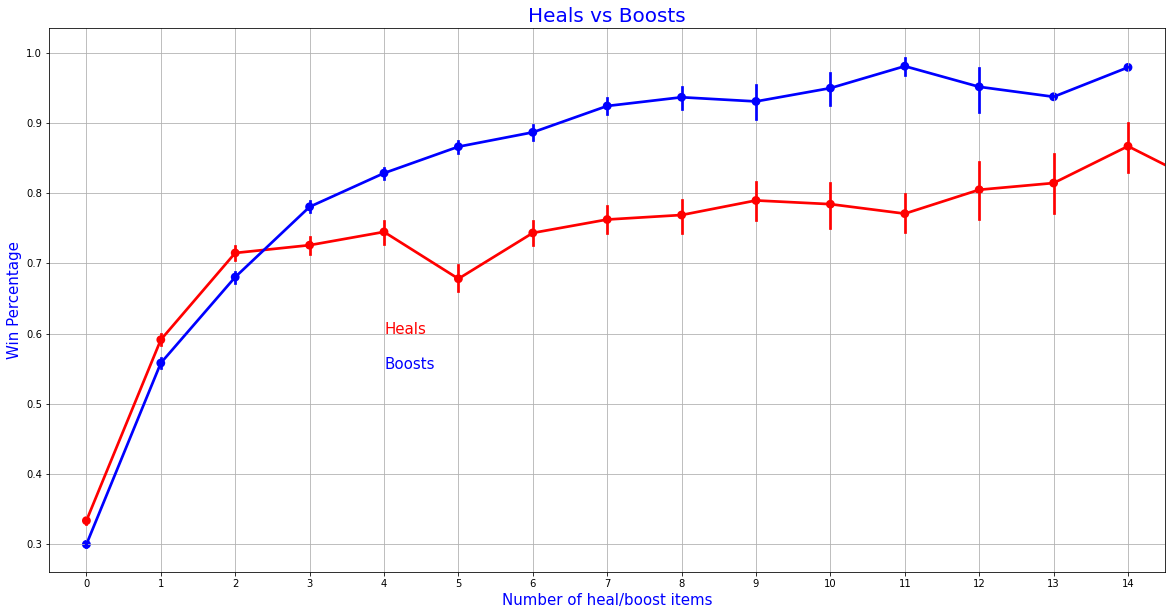

In [29]:
f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=train,color='red',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=train,color='blue',alpha=0.8)
plt.text(4,0.6,'Heals',color='red',fontsize = 15)
plt.text(4,0.55,'Boosts',color='blue',fontsize = 15)
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()
plt.show()

**winPlacePerc vs matchType(segmented)**

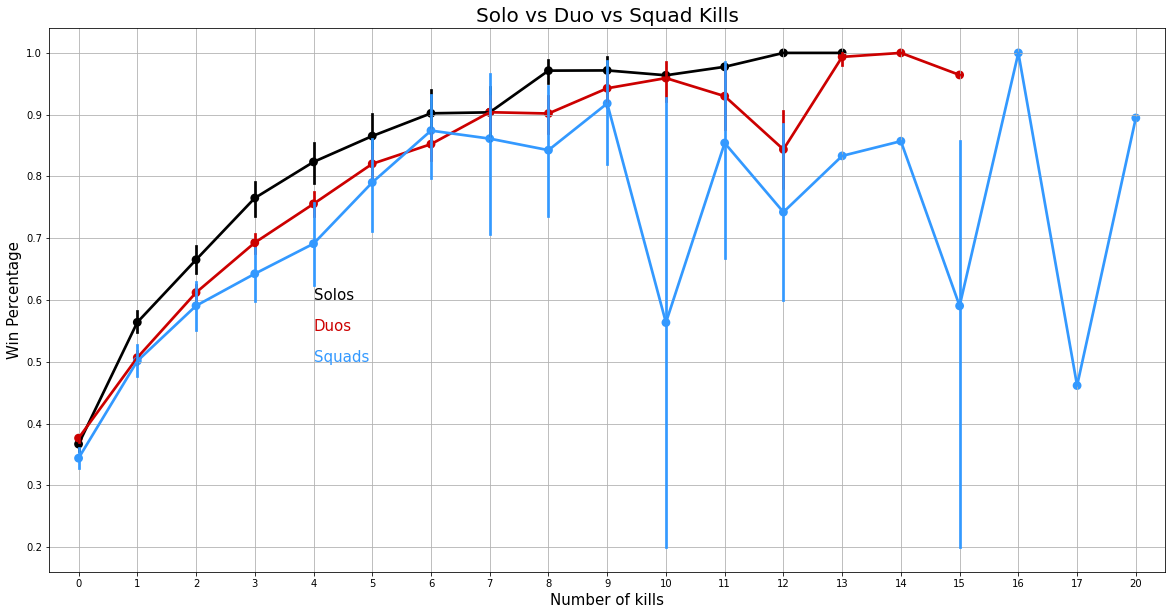

In [30]:
# f,ax1 = plt.subplots(figsize =(20,10))
f,ax = plt.subplots(figsize=(20,10))
solos = train[train['numGroups']>50]
duos = train[(train['numGroups']>25) & (train['numGroups']<=50)]
squads = train[train['numGroups']<=25]

sns.pointplot(x='kills',y='winPlacePerc',data=solos,color='black',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=duos,color='#CC0000',alpha=0.8)
sns.pointplot(x='kills',y='winPlacePerc',data=squads,color='#3399FF',alpha=0.8)
plt.text(4,0.6,'Solos',color='black',fontsize = 15)
plt.text(4,0.55,'Duos',color='#CC0000',fontsize = 15)
plt.text(4,0.5,'Squads',color='#3399FF',fontsize = 15)
plt.xlabel('Number of kills',fontsize = 15)
plt.ylabel('Win Percentage',fontsize = 15)
plt.title('Solo vs Duo vs Squad Kills',fontsize = 20)
plt.grid()
plt.show()

**Correlation on all features**

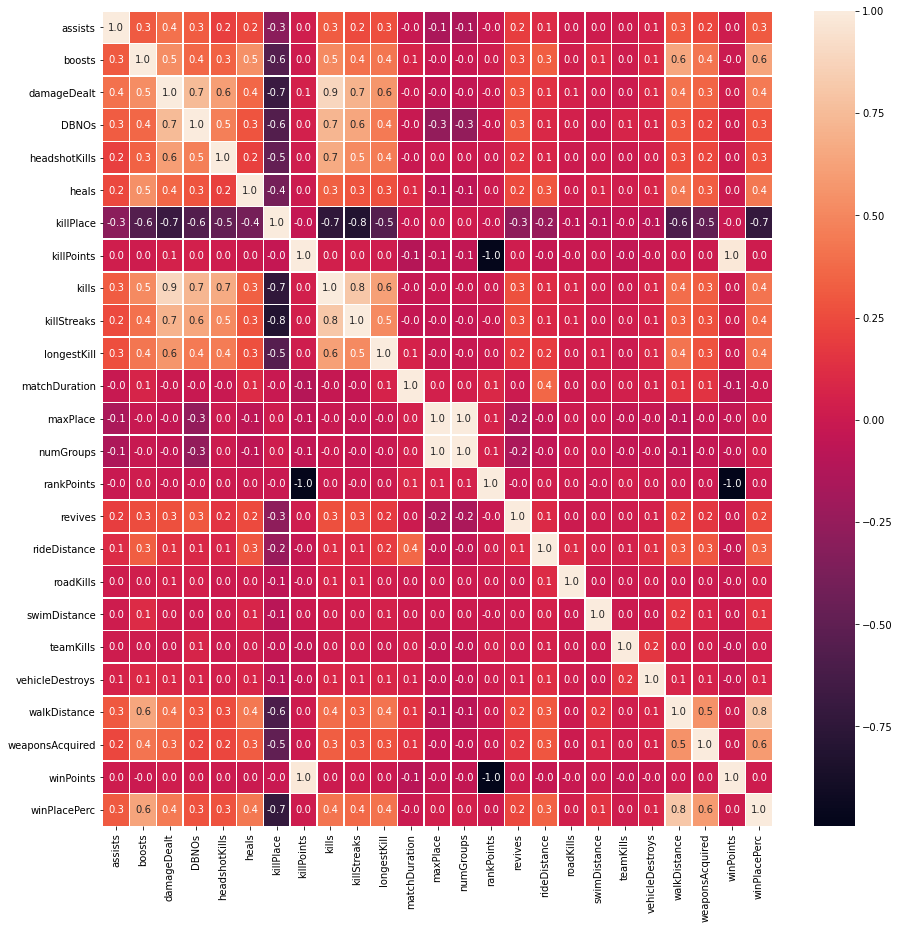

In [32]:
train_new = train.copy()
train_new.drop(['Id','groupId','matchId','matchType'],inplace=True,axis=1)
f,ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(train_new.corr(),annot=True,fmt= '.1f',linewidths=.5)
plt.show()

**Correlation on Highly correlated features**

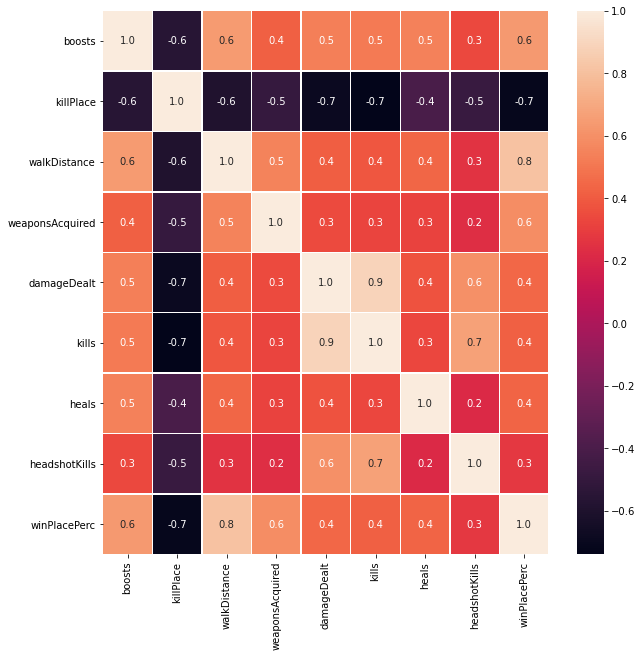

In [33]:
f,ax = plt.subplots(figsize=(10,10))
columns = ['boosts','killPlace','walkDistance','weaponsAcquired','damageDealt','kills','heals','headshotKills','winPlacePerc']
ax = sns.heatmap(train_new[columns].corr(),annot=True,fmt= '.1f',linewidths=.5)
plt.show()

**Creating New Features (Feature Engineering)**

In [34]:
train_new['healsandboosts'] = train_new['heals'] + train_new['boosts']
train_new['totalDistance'] = train_new['rideDistance'] + train_new['walkDistance'] + train_new['swimDistance']
train_new['headshot_rate'] = train_new['headshotKills'] / train_new['kills']
train_new['headshot_rate'] = train_new['headshot_rate'].fillna(0)
train_new[train_new['kills']>0].head()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,healsandboosts,totalDistance,headshot_rate
4,0,0,100.00,0,0,0,45,0,1,1,...,0.00,0,0,49.75,2,0,0.1875,0,49.75,0.0
14,0,1,122.80,1,0,2,25,1411,1,1,...,60.29,0,0,1666.00,5,1531,0.9000,3,2963.29,0.0
16,0,2,81.71,1,0,14,25,0,1,1,...,0.00,0,0,3674.00,7,0,0.7308,16,4193.90,0.0
20,0,4,269.10,0,1,8,18,0,2,1,...,0.00,0,0,1794.00,5,0,0.6383,12,4528.00,0.5
22,0,1,192.30,1,2,3,15,1022,2,1,...,0.00,0,0,1264.00,4,1494,0.7500,4,3596.00,1.0


### Outliers
**Removing Outliers**

Cheaters := Having kills without any movement

In [36]:
cheaters = len(train_new[((train_new['kills'] > 0) & (train_new['totalDistance'] == 0))].shape)
print ("No. of Players had kills without any movement(Cheaters): "+str(cheaters))
train_new.drop(train_new[((train_new['kills'] > 0) & (train_new['totalDistance'] == 0))].index, inplace=True)
print ("Deleted: "+str(cheaters))

No. of Players had kills without any movement(Cheaters): 2
Deleted: 2


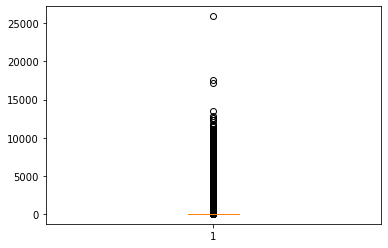

In [37]:
## timetoonekill
# x = train_new[train_new].matchDuration/(train_new['kills']*60)
# x.head()
plt.boxplot(train['rideDistance'])
plt.show()
# display(train[train['rideDistance'] >= 20000].shape)

Removing Players having value more than 20000

In [38]:
display(train_new[train_new['rideDistance'] >= 20000].shape)
train_new[train_new['rideDistance'] >= 20000].head(10)
train_new.drop(train_new[train_new['rideDistance'] >= 20000].index, inplace=True)
# display(train_new[train_new['rideDistance'] >= 20000].shape)

(1, 28)

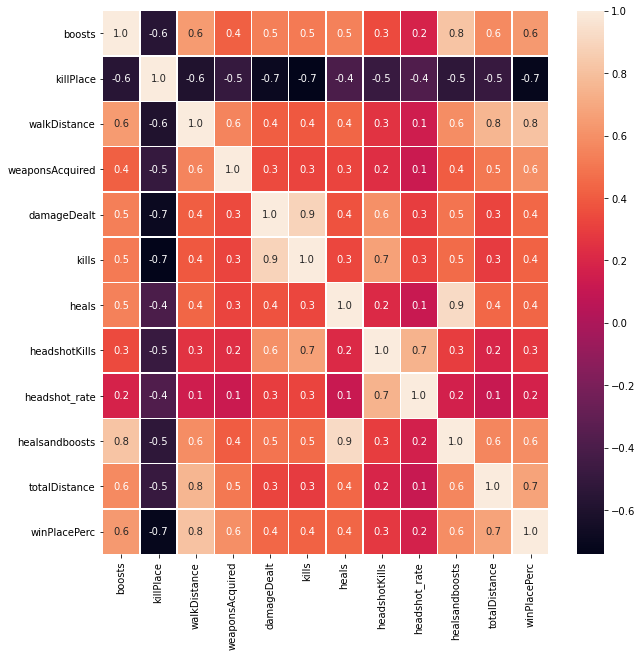

In [39]:
f,ax = plt.subplots(figsize=(10,10))
columns = ['boosts','killPlace','walkDistance','weaponsAcquired','damageDealt','kills','heals','headshotKills','headshot_rate','healsandboosts','totalDistance','winPlacePerc']
ax = sns.heatmap(train_new[columns].corr(),annot=True,fmt= '.1f',linewidths=.5)
plt.show()

* **Positive correlations :-** boosts,walkDistance, weaponsAcquired, healsandboosts, totalDistance
* **Negative correlation :-** killPlace

In [41]:
m = train_new.corr()['winPlacePerc']
m.sort_values(ascending=False).head(8)

winPlacePerc       1.000000
walkDistance       0.810239
totalDistance      0.679510
boosts             0.637735
weaponsAcquired    0.593341
healsandboosts     0.585082
damageDealt        0.446762
heals              0.435945
Name: winPlacePerc, dtype: float64

**Using only Top Features**

In [42]:
cols = ['walkDistance','killPlace','totalDistance','boosts','weaponsAcquired','healsandboosts','damageDealt','heals','winPlacePerc']
model_data = train_new[cols]
# model_data.shape
X = train_new.iloc[:,:7].values
Y = train_new.iloc[:,-1].values

**Train and Test Splitting** for model

**Feature Scaling** using Standard Scalar

In [44]:
from sklearn.model_selection import train_test_split
train_X,test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.30)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
train_X = sc.fit_transform(train_X)  
test_X = sc.transform(test_X) 

**Linear Regression** and its **r2_score**

In [46]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(train_X,train_Y)
pred_Y_LR = lin.predict(test_X)
from sklearn.metrics import r2_score
score_LR = r2_score(test_Y,pred_Y_LR)
print("Linear Regression r_2 score :"+str(score_LR))

Linear Regression r_2 score :0.623707111424527


**Random Forest** and its **r2_score**

In [47]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(max_depth = 12,criterion='mse',n_estimators=100)
reg.fit(train_X,train_Y)
pred_Y_RF = reg.predict(test_X)
from sklearn.metrics import r2_score
score_RF = r2_score(test_Y,pred_Y_RF)
print("Random Forest r_2 score :"+str(score_RF))

Random Forest r_2 score :0.9796799892488146
